In [1]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import scipy.io 
import sys
sys.path.append('/Users/yjzhu/Desktop/Solar/MyPy')
import juanfit
import importlib
importlib.reload(juanfit)
from juanfit import SpectrumFitSingle, SpectrumFitRow
import cmcrameri.cm as cmcm

In [13]:
spectrum_sav = scipy.io.readsav("../../save/spectrum/noti_chianti10/spectrum_pch_2063_eis_noti_chianti10_instdlamb.sav")
syn_spec = spectrum_sav["w"][:,0,:]
wvl = spectrum_sav["x"][0,0,0,:]
y_coord = spectrum_sav["x"][2,:,0,0]

In [14]:
syn_spec.shape

(41, 4103)

In [16]:
np.where(wvl>220)

(array([2049, 2050, 2051, ..., 4100, 4101, 4102]),)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


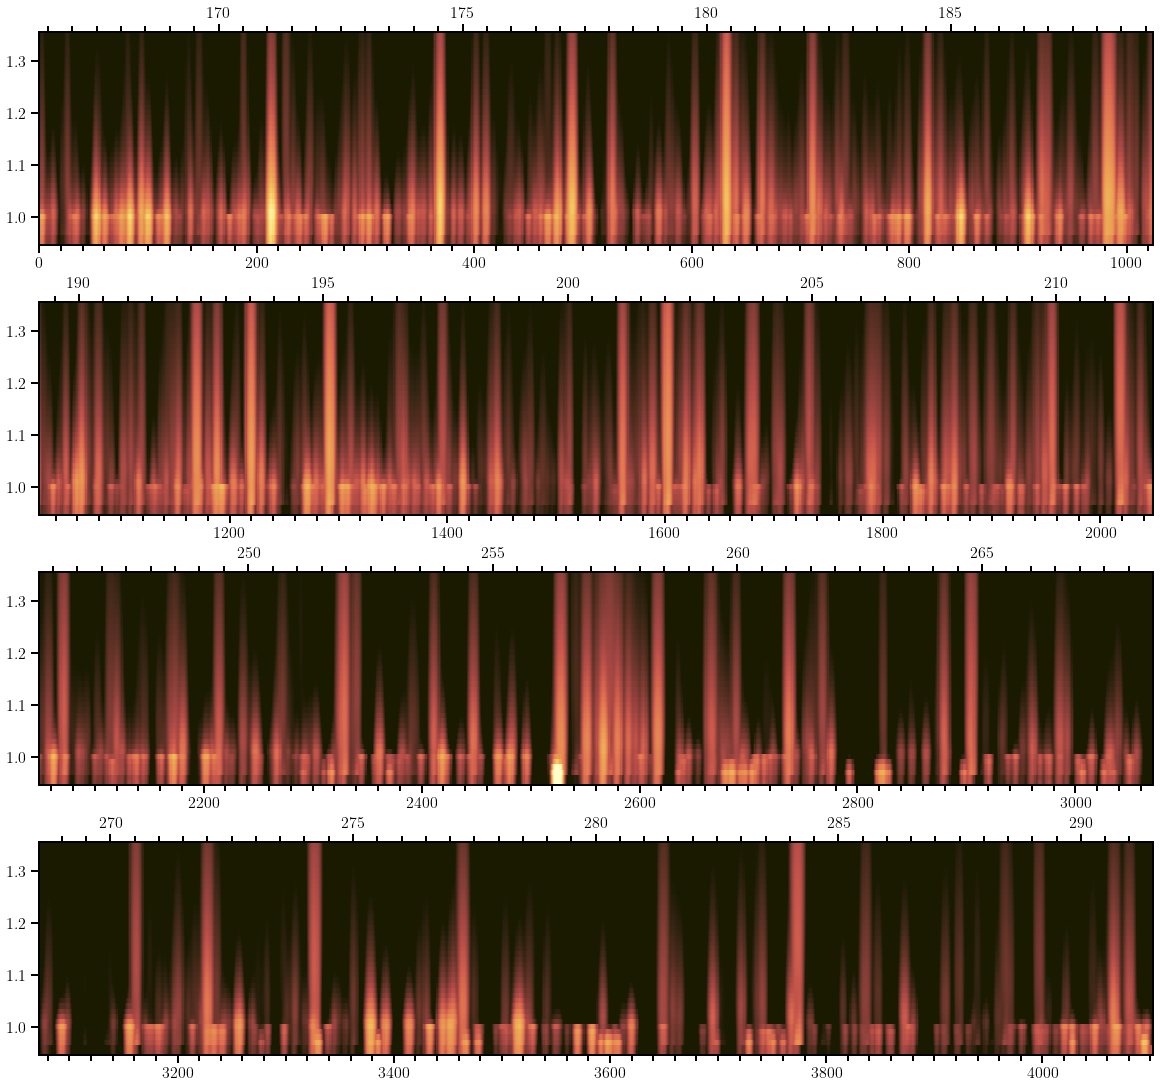

In [17]:
fig, axes = plt.subplots(4,1,figsize=(16,15),constrained_layout=True)

axes_range = ((0,1025),(1025,2049),(2049,3072),(3072,4103))
for ii in range(4):
    axes[ii].pcolormesh(np.arange(axes_range[ii][0],axes_range[ii][1]),y_coord,
                    np.nan_to_num(np.log10(syn_spec[:,axes_range[ii][0]:axes_range[ii][1]]),nan=-np.inf),
                    cmap=cmcm.lajolla_r,shading="auto",vmin=-1,vmax=5)

    ax_wvl = axes[ii].twiny()
    ax_wvl.set_xlim(wvl[axes_range[ii][0]],wvl[axes_range[ii][1]-1])
    axes[ii].xaxis.set_minor_locator(ticker.AutoMinorLocator(10))
    ax_wvl.xaxis.set_minor_locator(ticker.AutoMinorLocator(10))

    for ax_ in (axes[ii], ax_wvl):
        ax_.tick_params(labelsize=16)
        ax_.tick_params(which="major",width=2,length=8)
        ax_.tick_params(which="minor",width=2,length=6)


/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.04276907]


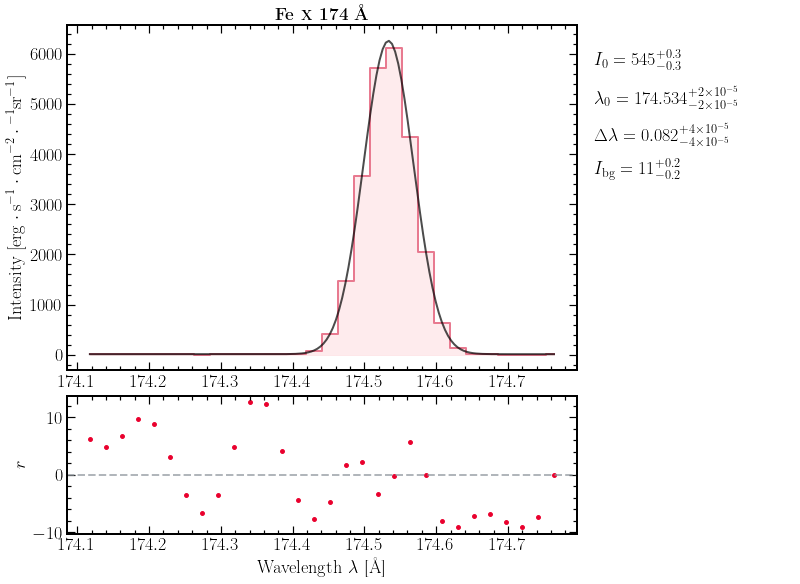

In [19]:
FeX_174_slice = (350,380)
wvl_FeX_174 = wvl[FeX_174_slice[0]:FeX_174_slice[1]]
int_FeX_174 = np.average(syn_spec[6:9,FeX_174_slice[0]:FeX_174_slice[1]],axis=0)

FeX_174_fit_model = SpectrumFitSingle(data=int_FeX_174,wvl=wvl_FeX_174,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[174.5],
                                      int_max_init=[10000],fwhm_init=[0.05])
# FeX_174_fit_model.plot(plot_fit=False,plot_params=False)
FeX_174_fit_model.run_HahnMC(n_chain=10000)
FeX_174_fit_model.plot(plot_title=r"\textbf{Fe \textsc{x} 174 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeX_174_fit_model.fwhm_fit_hmc**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.03961832 0.04710531]


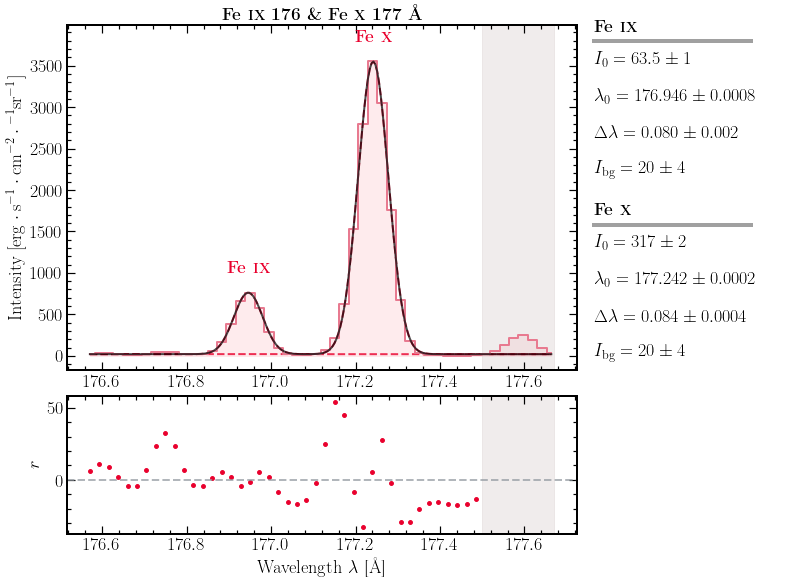

In [27]:
FeIX_176_FeX_177_slice = (460,510)
wvl_FeIX_176_FeX_177 = wvl[FeIX_176_FeX_177_slice[0]:FeIX_176_FeX_177_slice[1]]
int_FeIX_176_FeX_177 = np.average(syn_spec[6:9,FeIX_176_FeX_177_slice[0]:FeIX_176_FeX_177_slice[1]],axis=0)

FeIX_176_FeX_177_fit_model = SpectrumFitSingle(data=int_FeIX_176_FeX_177,wvl=wvl_FeIX_176_FeX_177,err=None,
                                      same_width=False,line_number=2,line_wvl_init=[176.95,177.22],
                                      int_max_init=[400,2000],fwhm_init=[0.08,0.08],mask=[[177.5,177.67]])
# FeIX_176_FeX_177_fit_model.plot(plot_fit=False,plot_params=False)
# FeIX_176_FeX_177_fit_model.run_HahnMC(n_chain=10000)
FeIX_176_FeX_177_fit_model.run_lse()
FeIX_176_FeX_177_fit_model.plot(plot_title=r"\textbf{Fe \textsc{ix} 176 \& Fe \textsc{x} 177 \mbox{\AA}}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{ix}}",r"\textbf{Fe \textsc{x}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeIX_176_FeX_177_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.05459586]


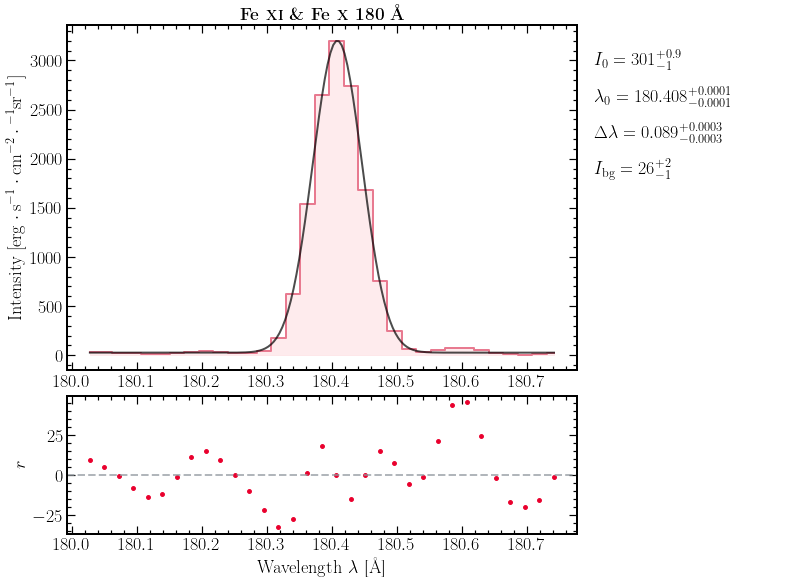

In [31]:
FeXI_FeX_180_slice = (615,648)
wvl_FeXI_FeX_180 = wvl[FeXI_FeX_180_slice[0]:FeXI_FeX_180_slice[1]]
int_FeXI_FeX_180 = np.average(syn_spec[6:9,FeXI_FeX_180_slice[0]:FeXI_FeX_180_slice[1]],axis=0)

FeXI_FeX_180_fit_model = SpectrumFitSingle(data=int_FeXI_FeX_180,wvl=wvl_FeXI_FeX_180,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[180.4],
                                      int_max_init=[1100],fwhm_init=[0.08])
# FeXI_FeX_180_fit_model.plot(plot_fit=False,plot_params=False)
FeXI_FeX_180_fit_model.run_HahnMC(n_chain=10000)
# FeXI_FeX_180_fit_model.run_lse()
FeXI_FeX_180_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} \& Fe \textsc{x} 180 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeXI_FeX_180_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.05051868 0.04330852]


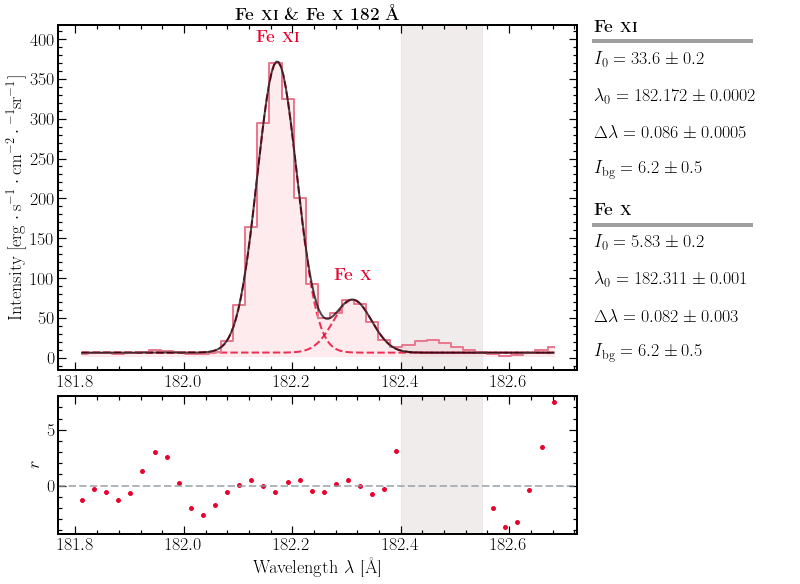

In [36]:
FeXI_FeX_182_slice = (695,735)
wvl_FeXI_FeX_182 = wvl[FeXI_FeX_182_slice[0]:FeXI_FeX_182_slice[1]]
int_FeXI_FeX_182 = np.average(syn_spec[6:9,FeXI_FeX_182_slice[0]:FeXI_FeX_182_slice[1]],axis=0)

FeXI_FeX_182_fit_model = SpectrumFitSingle(data=int_FeXI_FeX_182,wvl=wvl_FeXI_FeX_182,err=None,
                                      same_width=False,line_number=2,line_wvl_init=[182.18,182.28],
                                      int_max_init=[200,100],fwhm_init=[0.08,0.08],mask=[[182.4,182.55]])
# FeXI_FeX_182_fit_model.plot(plot_fit=False,plot_params=False)
# FeXI_FeX_182_fit_model.run_HahnMC(n_chain=10000)
FeXI_FeX_182_fit_model.run_lse()
FeXI_FeX_182_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} \& Fe \textsc{x} 182 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xi}}",r"\textbf{Fe \textsc{x}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeXI_FeX_182_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.04780941 0.04403298 0.04731883]


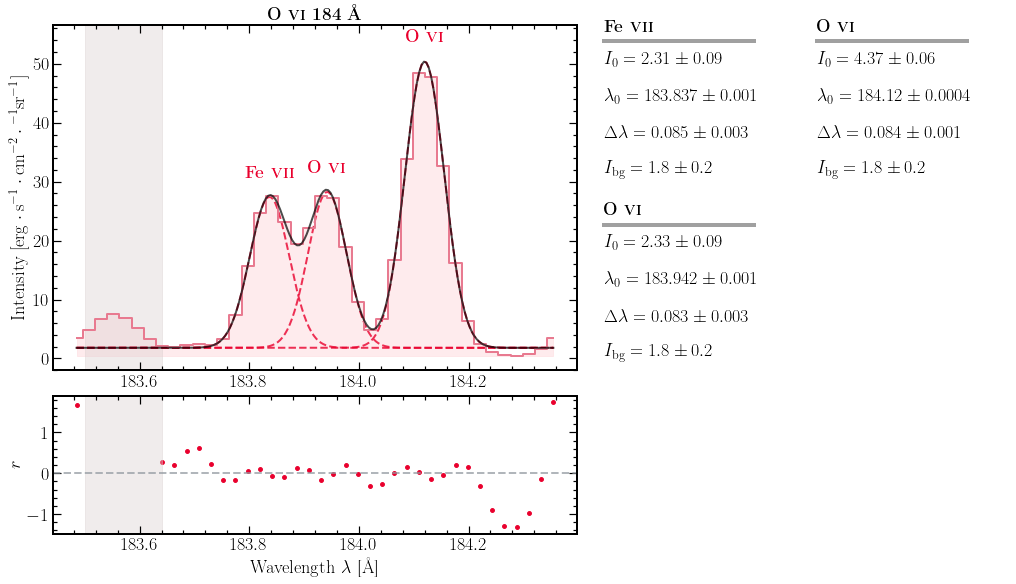

In [42]:
OVI_184_slice = (770,810)
wvl_OVI_184 = wvl[OVI_184_slice[0]:OVI_184_slice[1]]
int_OVI_184 = np.average(syn_spec[6:9,OVI_184_slice[0]:OVI_184_slice[1]],axis=0)

OVI_184_fit_model = SpectrumFitSingle(data=int_OVI_184,wvl=wvl_OVI_184,err=None,
                                      same_width=False,line_number=3,line_wvl_init=[183.83,183.93,184.1],
                                      int_max_init=[30,30,50],fwhm_init=[0.07,0.07,0.07],mask=[[183.5,183.64]])
# OVI_184_fit_model.plot(plot_fit=False,plot_params=False)
# OVI_184_fit_model.run_HahnMC(n_chain=10000)
OVI_184_fit_model.run_lse()
OVI_184_fit_model.plot(plot_title=r"\textbf{O \textsc{vi} 184 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{vii}}",r"\textbf{O \textsc{vi}}",
                            r"\textbf{O \textsc{vi}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(OVI_184_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.03762385 0.04524283]


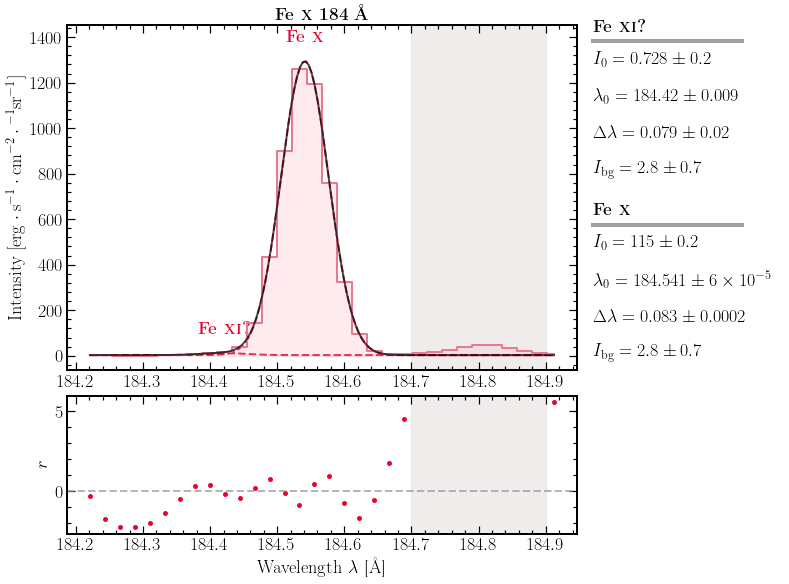

In [47]:
FeX_184_slice = (803,835)
wvl_FeX_184 = wvl[FeX_184_slice[0]:FeX_184_slice[1]]
int_FeX_184 = np.average(syn_spec[6:9,FeX_184_slice[0]:FeX_184_slice[1]],axis=0)

FeX_184_fit_model = SpectrumFitSingle(data=int_FeX_184,wvl=wvl_FeX_184,err=None,
                                      same_width=False,line_number=2,line_wvl_init=[184.4,184.53],
                                      int_max_init=[100,1000],fwhm_init=[0.07,0.07],mask=[[184.7,184.9]])
# FeX_184_fit_model.plot(plot_fit=False,plot_params=False)
# FeX_184_fit_model.run_HahnMC(n_chain=10000)
FeX_184_fit_model.run_lse()
FeX_184_fit_model.plot(plot_title=r"\textbf{Fe \textsc{x} 184 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xi}?}",r"\textbf{Fe \textsc{x}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeX_184_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.04130447]


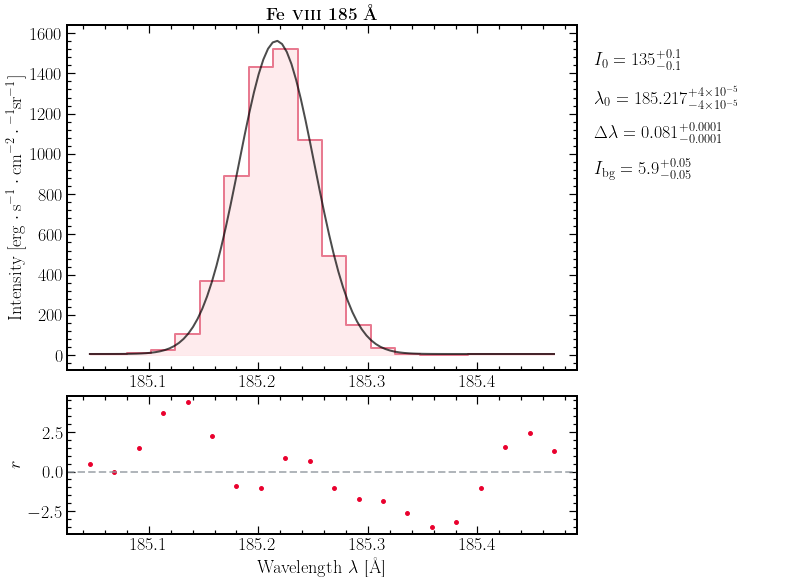

In [53]:
FeVIII_185_slice = (840,860)
wvl_FeVIII_185 = wvl[FeVIII_185_slice[0]:FeVIII_185_slice[1]]
int_FeVIII_185 = np.average(syn_spec[6:9,FeVIII_185_slice[0]:FeVIII_185_slice[1]],axis=0)

FeVIII_185_fit_model = SpectrumFitSingle(data=int_FeVIII_185,wvl=wvl_FeVIII_185,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[185.2],
                                      int_max_init=[800],fwhm_init=[0.07])
# FeVIII_185_fit_model.plot(plot_fit=False,plot_params=False)
FeVIII_185_fit_model.run_HahnMC(n_chain=10000)
# FeVIII_185_fit_model.run_lse()
FeVIII_185_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 185 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_185_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt


FWHM after removing instrumental broadening:  [       nan 0.08807243]


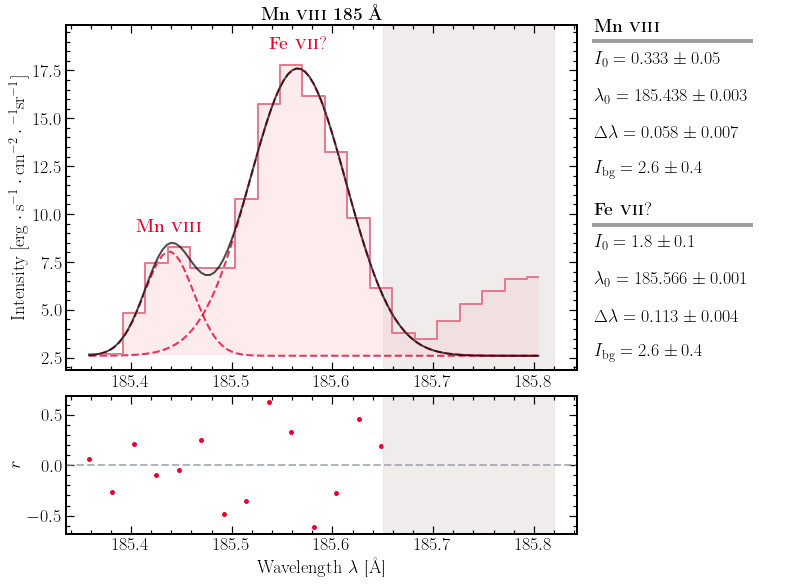

In [65]:
MnVIII_185_slice = (854,875)
wvl_MnVIII_185 = wvl[MnVIII_185_slice[0]:MnVIII_185_slice[1]]
int_MnVIII_185 = np.average(syn_spec[6:9,MnVIII_185_slice[0]:MnVIII_185_slice[1]],axis=0)

MnVIII_185_fit_model = SpectrumFitSingle(data=int_MnVIII_185,wvl=wvl_MnVIII_185,err=None,
                                      same_width=False,line_number=2,line_wvl_init=[185.45,185.55],
                                      int_max_init=[8,18],fwhm_init=[0.06,0.06],mask=[[185.65,185.82]],
                                      int_cont_init=0)
# MnVIII_185_fit_model.plot(plot_fit=False,plot_params=False)
# MnVIII_185_fit_model.run_HahnMC(n_chain=10000)
MnVIII_185_fit_model.run_lse()
MnVIII_185_fit_model.plot(plot_title=r"\textbf{Mn \textsc{viii} 185 \mbox{\AA}}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Mn \textsc{viii}}",r"\textbf{Fe \textsc{vii}}?"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(MnVIII_185_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.04363565]


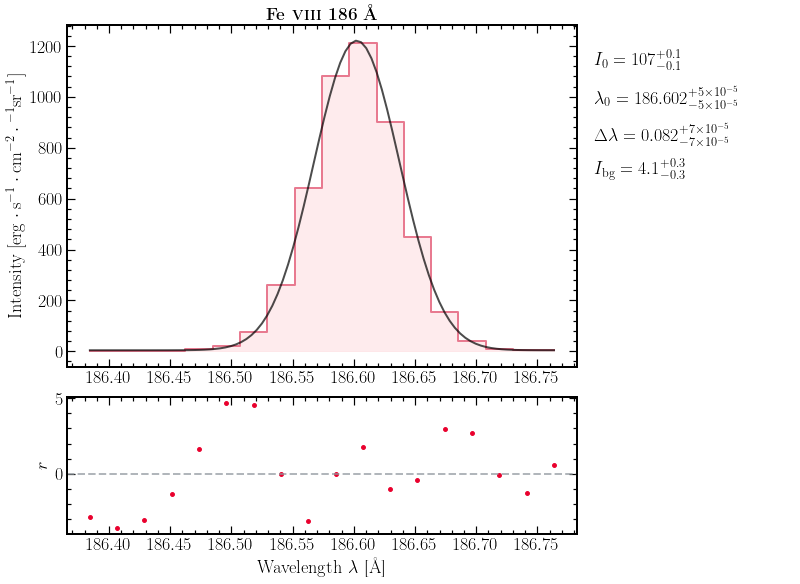

In [73]:
FeVIII_186_slice = (900,918)
wvl_FeVIII_186 = wvl[FeVIII_186_slice[0]:FeVIII_186_slice[1]]
int_FeVIII_186 = np.average(syn_spec[6:9,FeVIII_186_slice[0]:FeVIII_186_slice[1]],axis=0)

FeVIII_186_fit_model = SpectrumFitSingle(data=int_FeVIII_186,wvl=wvl_FeVIII_186,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[186.6],
                                      int_max_init=[600],fwhm_init=[0.07])
# FeVIII_186_fit_model.plot(plot_fit=False,plot_params=False)
FeVIII_186_fit_model.run_HahnMC(n_chain=10000)
# FeVIII_186_fit_model.run_lse()
FeVIII_186_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 186 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_186_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.07692003 0.06107669 0.04437174 0.04061539]


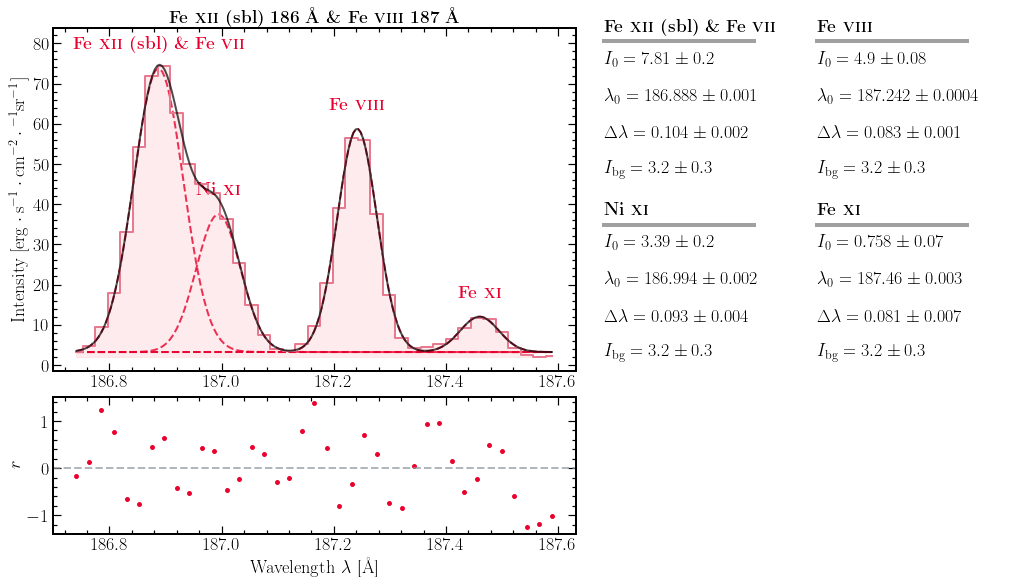

In [81]:
FeXII_186_slice = (916,955)
wvl_FeXII_186 = wvl[FeXII_186_slice[0]:FeXII_186_slice[1]]
int_FeXII_186 = np.average(syn_spec[6:9,FeXII_186_slice[0]:FeXII_186_slice[1]],axis=0)

FeXII_186_fit_model = SpectrumFitSingle(data=int_FeXII_186,wvl=wvl_FeXII_186,err=None,
                                      same_width=False,line_number=4,line_wvl_init=[186.88,186.97,187.22,187.48],
                                      int_max_init=[70,40,50,10],fwhm_init=[0.08,0.08,0.08,0.08])
# FeXII_186_fit_model.plot(plot_fit=False,plot_params=False)
# FeXII_186_fit_model.run_HahnMC(n_chain=10000)
FeXII_186_fit_model.run_lse()
FeXII_186_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xii} (sbl) 186 \mbox{\AA} \& Fe \textsc{viii} 187 \mbox{\AA}}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xii} (sbl) \& Fe \textsc{vii}}",
                                 r"\textbf{Ni \textsc{xi}}",r"\textbf{Fe \textsc{viii}}",r"\textbf{Fe \textsc{xi}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeXII_186_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.05204221 0.05204221 0.04666303 0.07240841]


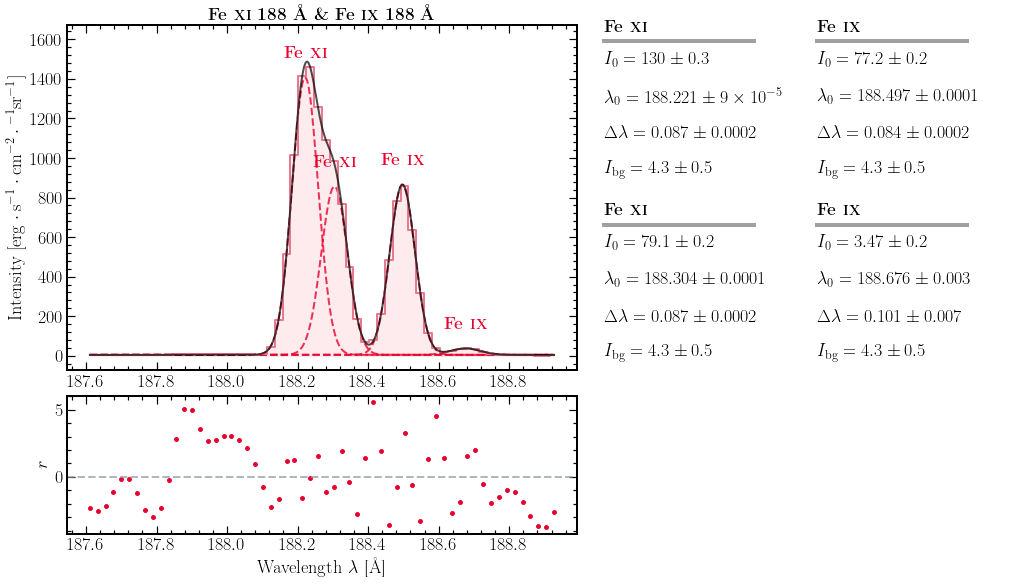

In [85]:
FeXI_188_slice = (955,1015)
wvl_FeXI_188 = wvl[FeXI_188_slice[0]:FeXI_188_slice[1]]
int_FeXI_188 = np.average(syn_spec[6:9,FeXI_188_slice[0]:FeXI_188_slice[1]],axis=0)

FeXI_188_fit_model = SpectrumFitSingle(data=int_FeXI_188,wvl=wvl_FeXI_188,err=None,
                                      same_width=[True,True,False,False],line_number=4,
                                      line_wvl_init=[188.2,188.29,188.49,188.68],
                                      int_max_init=[1400,800,800,50],fwhm_init=[0.08,0.08,0.08,0.08])
# FeXI_188_fit_model.plot(plot_fit=False,plot_params=False)
# FeXI_188_fit_model.run_HahnMC(n_chain=10000)
FeXI_188_fit_model.run_lse()
FeXI_188_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} 188 \mbox{\AA} \& Fe \textsc{ix} 188 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xi}}",
                        r"\textbf{Fe \textsc{xi}}",r"\textbf{Fe \textsc{ix}}",r"\textbf{Fe \textsc{ix}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeXI_188_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

<AxesSubplot:ylabel='Intensity'>

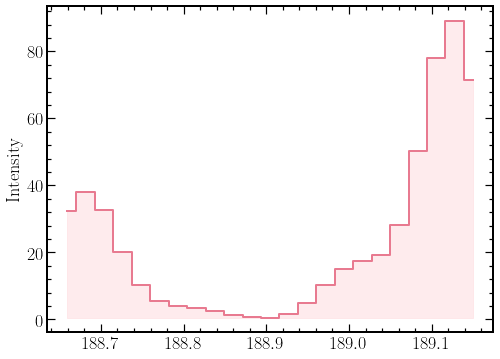

In [86]:
FeXI_188_189_slice = (1002,1025)
wvl_FeXI_188_189 = wvl[FeXI_188_189_slice[0]:FeXI_188_189_slice[1]]
int_FeXI_188_189 = np.average(syn_spec[6:9,FeXI_188_189_slice[0]:FeXI_188_189_slice[1]],axis=0)

FeXI_188_189_fit_model = SpectrumFitSingle(data=int_FeXI_188_189,wvl=wvl_FeXI_188_189,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[180.4],
                                      int_max_init=[1100],fwhm_init=[0.08])
FeXI_188_189_fit_model.plot(plot_fit=False,plot_params=False)
# FeXI_188_189_fit_model.run_HahnMC(n_chain=10000)
# FeXI_188_189_fit_model.run_lse()
# FeXI_188_189_fit_model.plot(plot_title=r"\textbf{Fe \textsc{ix} 176 \& Fe \textsc{x} 177 \mbox{\AA}}",plot_hmc=False,
#                                  xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{ix}}",r"\textbf{Fe \textsc{x}}"],
#                               ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

# print("FWHM after removing instrumental broadening: ",np.sqrt(FeXI_188_189_fit_model.fwhm_fit**2 - \
#                                                    0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.06110529]


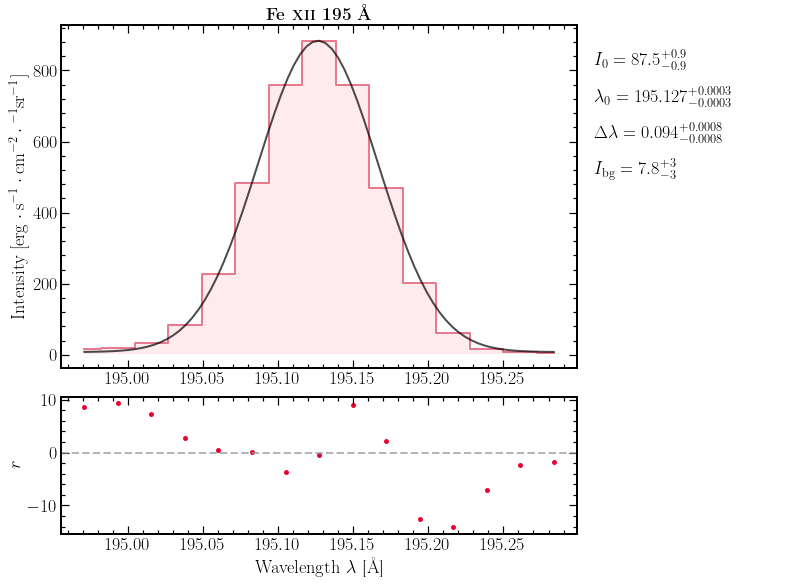

In [91]:
FeXII_195_slice = (1285,1300)
wvl_FeXII_195 = wvl[FeXII_195_slice[0]:FeXII_195_slice[1]]
int_FeXII_195 = np.average(syn_spec[6:9,FeXII_195_slice[0]:FeXII_195_slice[1]],axis=0)

FeXII_195_fit_model = SpectrumFitSingle(data=int_FeXII_195,wvl=wvl_FeXII_195,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[195.12],
                                      int_max_init=[800],fwhm_init=[0.08])
# FeXII_195_fit_model.plot(plot_fit=False,plot_params=False)
FeXII_195_fit_model.run_HahnMC(n_chain=10000)
# FeXII_195_fit_model.run_lse()
FeXII_195_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xii} 195 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeXII_195_fit_model.fwhm_fit**2 - \
                                                   0.07**2))